In [1]:
import pandas as pd
df=pd.read_csv('G:/OS work/Files/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


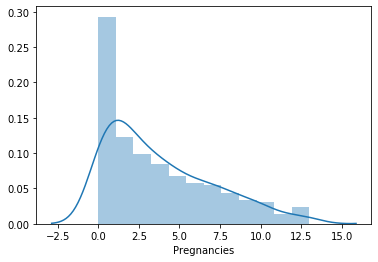

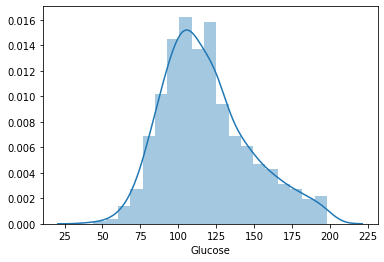

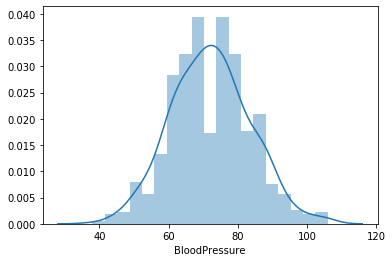

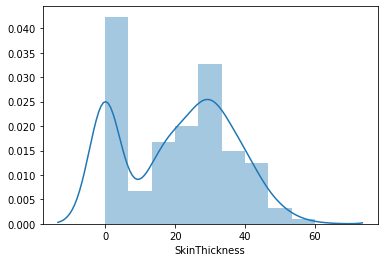

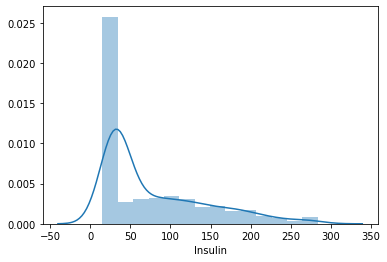

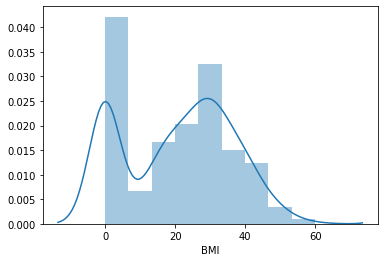

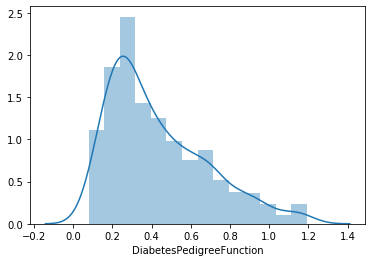

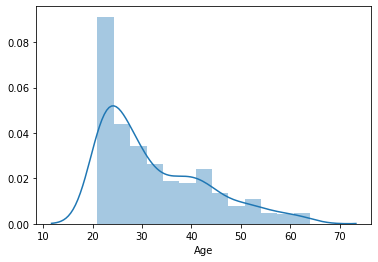

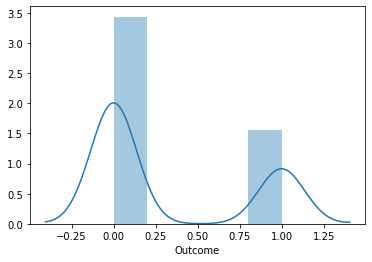

In [49]:
# Distribution of Data

import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

Some data is not possible to exist in real case scenario like glucose value below 0. <br>
Changing such data to possible value 

In [5]:
import numpy as np
df['Glucose']=np.where(df['Glucose']<10,df['Glucose']==10,df['Glucose']) 
df['Insulin']=np.where(df['Insulin']==0,df['Insulin'].median(),df['Insulin']) 
df['SkinThickness']=np.where(df['SkinThickness']<10,df['SkinThickness']==10,df['SkinThickness']) 
df['BMI']=np.where(df['BMI']<10,df['SkinThickness'].median(),df['SkinThickness']) 
df['BloodPressure']=np.where(df['BloodPressure']<20,df['BloodPressure']==20,df['BloodPressure']) 
df['Pregnancies']=np.where(df['Pregnancies']<0,df['Pregnancies']==0,df['Pregnancies']) 


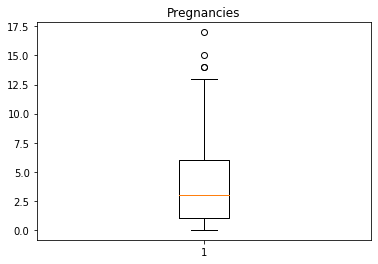

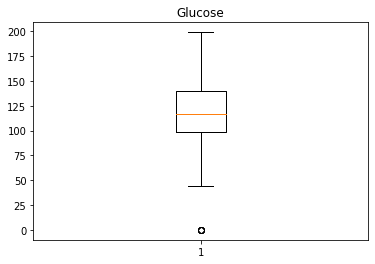

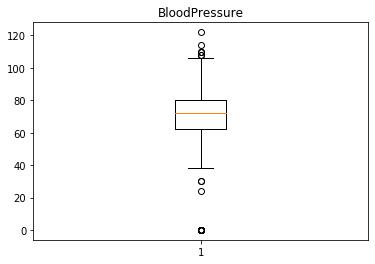

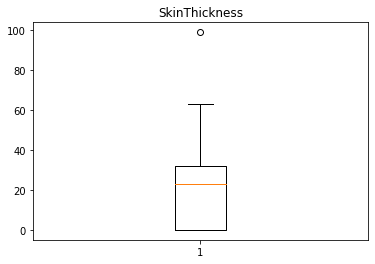

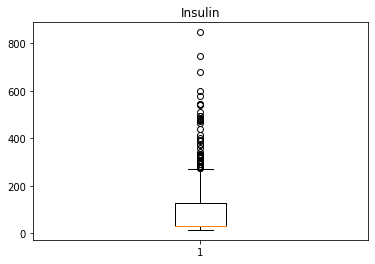

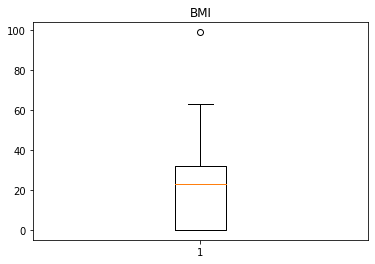

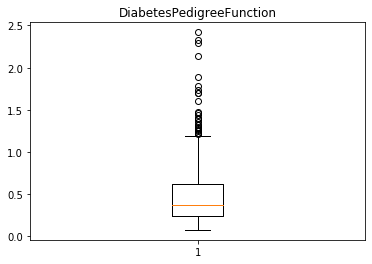

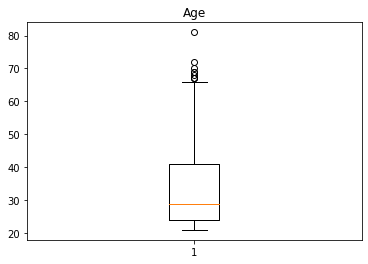

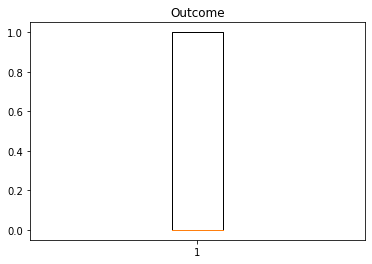

In [6]:
# Plotting Boxplot for seeing outliers if any.

for i in df.columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [7]:
for feature in df.columns:
    quantile1,quantile3=np.percentile(df[feature],[25,75])     # Defining the quantile ranges

    iqr=quantile3-quantile1                                    # Defining inter quantile range      
    lower_bound=quantile1-(1.5*iqr)                            # Defining lower bound of outliers
    upper_bound=quantile3+(1.5*iqr)                            # Defining upper bound of outliers
    percentage_outliers=(len(df[(df[feature]>upper_bound) | (df[feature]<lower_bound)])/df.shape[0])*100 #Defining % outliers.

    print('percentage outliers in {} is {:.2f}%'.format(feature,percentage_outliers))

    
    


percentage outliers in Pregnancies is 0.52%
percentage outliers in Glucose is 0.65%
percentage outliers in BloodPressure is 5.86%
percentage outliers in SkinThickness is 0.13%
percentage outliers in Insulin is 6.38%
percentage outliers in BMI is 0.13%
percentage outliers in DiabetesPedigreeFunction is 3.78%
percentage outliers in Age is 1.17%
percentage outliers in Outcome is 0.00%


Removing Outliers,since their percentage is also less

In [8]:
for feature in df.columns:
    quantile1,quantile3=np.percentile(df[feature],[25,75])     # Defining the quantile ranges

    iqr=quantile3-quantile1                                    # Defining inter quantile range      
    lower_bound=quantile1-(1.5*iqr)                            # Defining lower bound of outliers
    upper_bound=quantile3+(1.5*iqr)                            # Defining upper bound of outliers
    df=df[(df[feature]<=upper_bound)&(df[feature]>=lower_bound)]   # Taking only that data which is under the boundry we defined
    percentage_outliers=(len(df[(df[feature]>upper_bound) | (df[feature]<lower_bound)])/df.shape[0])*100 #Defining % outliers.


    print('percentage outliers in {} is {:.2f}'.format(feature,percentage_outliers))

percentage outliers in Pregnancies is 0.00
percentage outliers in Glucose is 0.00
percentage outliers in BloodPressure is 0.00
percentage outliers in SkinThickness is 0.00
percentage outliers in Insulin is 0.00
percentage outliers in BMI is 0.00
percentage outliers in DiabetesPedigreeFunction is 0.00
percentage outliers in Age is 0.00
percentage outliers in Outcome is 0.00


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.2,random_state=0)

### Feature Selection
1) mutual_info_classif <br>
2) p-value

In [48]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.01563532, 0.1390962 , 0.02133452, 0.03348352, 0.0430772 ,
       0.01028995, 0.01205003, 0.08162565])

In [11]:
mutual_info=pd.Series(mutual_info,index=X_train.columns)
mutual_info.sort_values()

BloodPressure               0.000000
DiabetesPedigreeFunction    0.011880
Insulin                     0.037389
BMI                         0.038041
SkinThickness               0.041732
Pregnancies                 0.047927
Age                         0.085683
Glucose                     0.143763
dtype: float64

In [12]:
from sklearn.feature_selection import chi2
f_p_value=chi2(X_train,y_train)
f_p_value

(array([ 72.52869277, 872.31583433,  39.85416481,  11.43595357,
        393.95517259,  13.81077559,   2.36872123, 130.35596172]),
 array([1.64621025e-017, 1.02359953e-191, 2.73650062e-010, 7.20364958e-004,
        1.13983604e-087, 2.02173375e-004, 1.23788416e-001, 3.42505208e-030]))

In [13]:
f_p_value[1]<0.05
# Since all the features are having p-value below 0.05,these features are important

array([ True,  True,  True,  True,  True,  True, False,  True])

### Feature Scaling


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier().fit(X_train,y_train)


In [32]:
params={'max_depth'          : [1,2,3,4,5,6,7],
         'max_features'       : [1,2,3,4,5,6,7],
        'max_leaf_nodes'      : [2,3,4,5,6,7]}

In [33]:
from sklearn.model_selection import RandomizedSearchCV
cv=RandomizedSearchCV(model,param_distributions=params,scoring='roc_auc',cv=5).fit(X_train,y_train)
cv.best_params_

{'max_leaf_nodes': 6, 'max_features': 6, 'max_depth': 3}

In [34]:
model=RandomForestClassifier(max_depth=3,max_features=6,max_leaf_nodes=6).fit(X_train,y_train)

In [35]:
y_pred=model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(' Model: Random Forest\n Accuracy of model: {:.2f}'.format(score))
print(' Confusion Matrix: \n ',confusion)
print('Classification report: \n',report)

 Model: Random Forest
 Accuracy of model: 0.76
 Confusion Matrix: 
  [[77  8]
 [22 19]]
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        85
           1       0.70      0.46      0.56        41

    accuracy                           0.76       126
   macro avg       0.74      0.68      0.70       126
weighted avg       0.75      0.76      0.75       126



## SVM

In [37]:
from sklearn.svm import SVC
model=SVC()

params={'C'         : [1,5,10,20,25,40,50,75,80,100],
        'kernel'    : ['linear','rbf'],
        'gamma'     : [1e-10,1e-8,1e-5,1e-2,1e-1,1,5,10,20,30,50,70,90,100]}

from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(model,param_grid=params,scoring='roc_auc',cv=10,n_jobs=-1).fit(X_train,y_train)

In [38]:
grid_search.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [39]:
model=SVC(C=75,gamma=0.01,kernel='rbf').fit(X_train,y_train)
y_pred=model.predict(X_test)

score=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(' Model: Support Vector Machine\n Accuracy of model: {:.2f}'.format(score))
print(' Confusion Matrix: \n ',confusion)
print('Classification report: \n',report)

 Model: Support Vector Machine
 Accuracy of model: 0.76
 Confusion Matrix: 
  [[77  8]
 [22 19]]
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        85
           1       0.70      0.46      0.56        41

    accuracy                           0.76       126
   macro avg       0.74      0.68      0.70       126
weighted avg       0.75      0.76      0.75       126



## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)

score=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(' Model: Logistic Regression\n Accuracy of model: {:.2f}'.format(score))
print(' Confusion Matrix: \n ',confusion)
print('Classification report: \n',report)

 Model: Logistic Regression
 Accuracy of model: 0.77
 Confusion Matrix: 
  [[77  8]
 [21 20]]
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.91      0.84        85
           1       0.71      0.49      0.58        41

    accuracy                           0.77       126
   macro avg       0.75      0.70      0.71       126
weighted avg       0.76      0.77      0.76       126



## K-Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
params={'leaf_size'    : [10,20,30,50,60,80,100],
        'n_neighbors'  : [1,2,3,4,6,10,15,20,30,50],
        'p'            : [1,2,3,5,10]}
grid_search=GridSearchCV(model,param_grid=params,scoring='roc_auc',cv=10,n_jobs=-1).fit(X_train,y_train)

In [42]:
grid_search.best_params_

{'leaf_size': 10, 'n_neighbors': 30, 'p': 5}

In [47]:
model=KNeighborsClassifier(leaf_size=10,n_neighbors=30,p=5).fit(X_train,y_train)
y_pred=model.predict(X_test)

score=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(' Model: K-Nearest Neighbors\n Accuracy of model: {:.2f}'.format(score))
print(' Confusion Matrix: \n ',confusion)
print('Classification report: \n',report)

 Model: K-Nearest Neighbors
 Accuracy of model: 0.72
 Confusion Matrix: 
  [[80  5]
 [30 11]]
Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.94      0.82        85
           1       0.69      0.27      0.39        41

    accuracy                           0.72       126
   macro avg       0.71      0.60      0.60       126
weighted avg       0.71      0.72      0.68       126



## Naive Baye's 

In [44]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

params={'var_smoothing' : [1e-10,1e-09,1e-05,0.01,0.1,1,10,20,50,80,100]}

grid_search=GridSearchCV(model,param_grid=params,scoring='roc_auc',cv=10,n_jobs=-1).fit(X_train,y_train)
grid_search.best_params_

{'var_smoothing': 1}

In [45]:
model=GaussianNB(var_smoothing=1).fit(X_train,y_train)
y_pred=model.predict(X_test)

score=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(' Model: Naive Bayes\n Accuracy of model: {:.2f}'.format(score))
print(' Confusion Matrix: \n ',confusion)
print('Classification report: \n',report)

 Model: Naive Bayes
 Accuracy of model: 0.76
 Confusion Matrix: 
  [[81  4]
 [26 15]]
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.95      0.84        85
           1       0.79      0.37      0.50        41

    accuracy                           0.76       126
   macro avg       0.77      0.66      0.67       126
weighted avg       0.77      0.76      0.73       126



Accuracy among all the models is between 75-85% <br>
Although accuracy gives only half picture about the model <br>
Here our aim should be to reduce as much False Negative as possible since we are predicting the disease. <br>
And among all the models, Logistic regression is giving minimum False Negative classifications. <br>
Therefore Logistic Regression model is best model among all for this dataset.